In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
file_path = "C:\\Users\\Administrator\\Downloads\\breast+cancer+wisconsin+diagnostic\\wdbc.data"  # Update with the correct file path

# Load the dataset
data = pd.read_csv(file_path, header=None)

# Add column names
names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
         "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
         "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
         "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
         "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
         "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
data.columns = names


In [4]:
# Drop ID column
data.drop("id", axis=1, inplace=True)

# Convert diagnosis to binary (M=1, B=0)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Split features and target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

Accuracy: 0.956140350877193


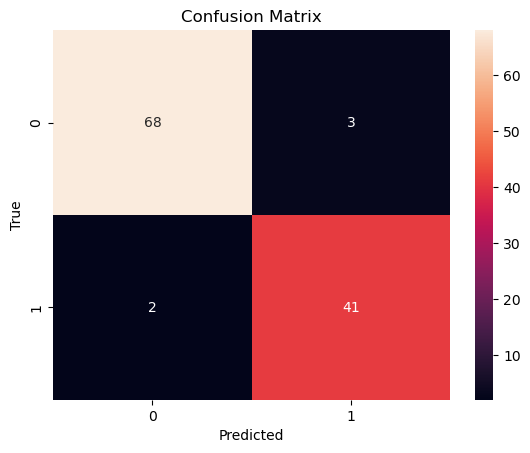

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [6]:
# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
